## Introduction

- Ahmad Rizani / 007

## Objective

- Tujuan dari Aplikasi ini adalah untuk membuat kluster pada Pplayers_statsemain NBA, agar pemiliki Tim dapat mengetahui kondisi dari setiap pemainnya yang mana bertujuan untuk memperbaiki kualitas tim. Pemain dengan kluster tertentu bisa saja menguntungkan sebuah Tim, namun ada pula cluster yang memiliki kinerja buruk sehingga merugikan Tim. 

# 1. Import Library

In [3]:
# common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

# preprocessing data 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline

# model machine learning
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

# ignore warning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 2. Data Loading

In [4]:
data = pd.read_csv('players_stats.csv')
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          490 non-null    object 
 1   Games Played  490 non-null    int64  
 2   MIN           490 non-null    int64  
 3   PTS           490 non-null    int64  
 4   FGM           490 non-null    int64  
 5   FGA           490 non-null    int64  
 6   FG%           490 non-null    float64
 7   3PM           490 non-null    int64  
 8   3PA           490 non-null    int64  
 9   3P%           490 non-null    float64
 10  FTM           490 non-null    int64  
 11  FTA           490 non-null    int64  
 12  FT%           490 non-null    float64
 13  OREB          490 non-null    int64  
 14  DREB          490 non-null    int64  
 15  REB           490 non-null    int64  
 16  AST           490 non-null    int64  
 17  STL           490 non-null    int64  
 18  BLK           490 non-null    

In [6]:
# Mengganti value R (Rookie) menjadi 0
df['Experience'] = np.where(df['Experience'] == 'R', 0, df['Experience'])

# Mengisi value NaN dengan median
df['Experience'] = df['Experience'].fillna(df['Experience'].median())

# Mengganti tipe data object menjadi int
df['Experience'] = df['Experience'].astype('int')

In [7]:
df = df.drop(['Name','Age','Birth_Place', 'Birthdate', 'Collage', 'Height', 'Pos', 'Team', 'Weight', 'BMI'], axis=1)

# 3. Exploratory Data Analysis

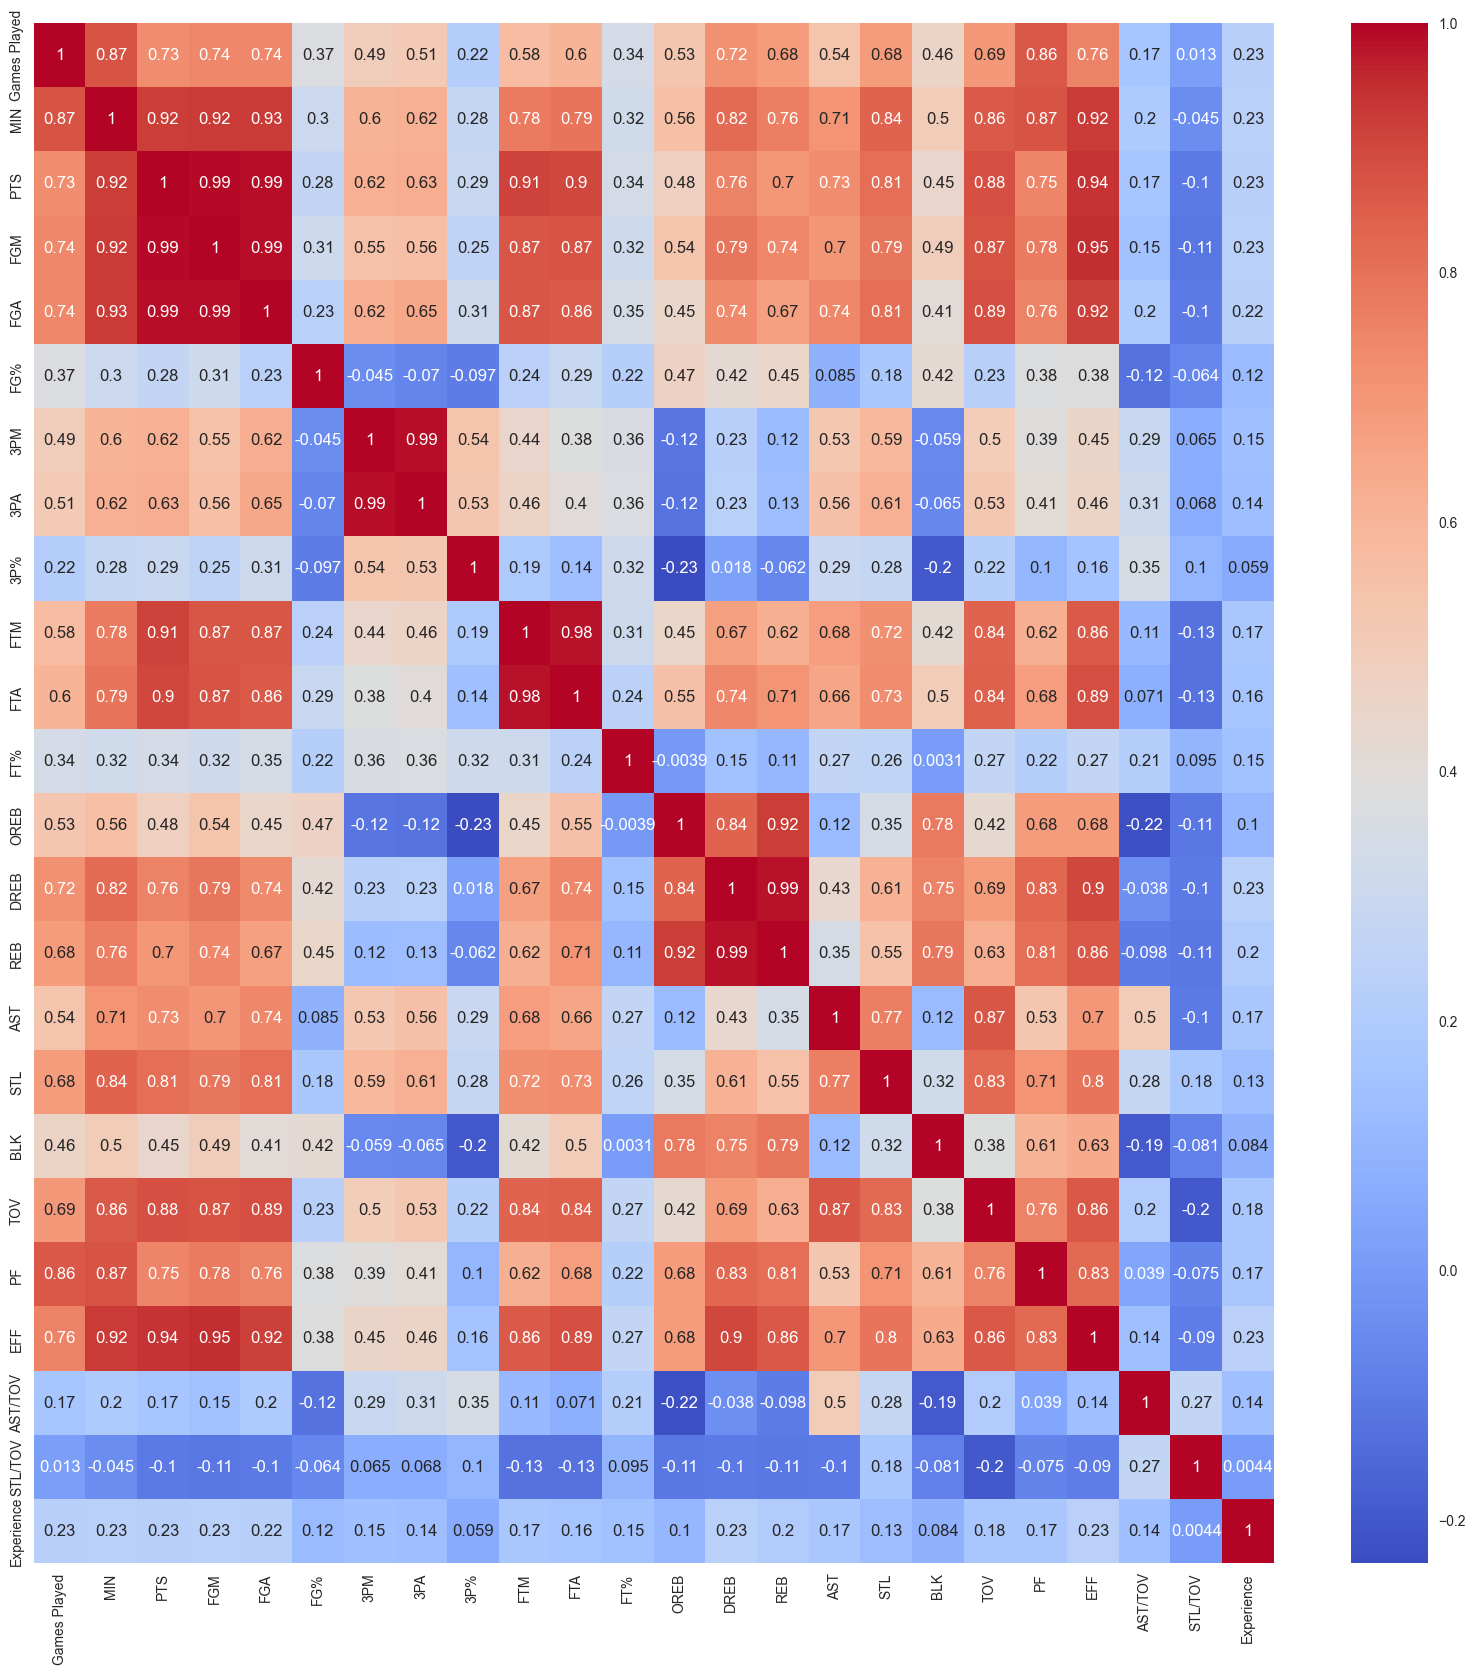

In [8]:
from pylab import savefig
plt.figure(figsize=(20,20))
svm = sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

figure = svm.get_figure()

`Berdasarkan Heatmap terdapat banyak fitur yang memiliki nilai korelasi positif yang tinggi dan adapula yang memiliki korelasi negatif yang lumayan tinggi, berikut beberapa contoh diantaranya :`

**Korelasi Positif**
- Jika FGA (Field Goal Attempt) meningkat, maka kemungkinan FGM(Field Goal Made) akan meningkat pula
- Jika FGM (Field Goal Made) meningkat, maka PTS (Points) juga akan lebih banyak
- Jika EFF (Efficiency ) meningkat, maka kemungkinan mencetak PTS (Points) akan meningkat juga


**Korelasi Negatif**
- Jika 3P% (3 Point Percentage) Jelek, maka kemungkinan untuk OREB (Offensive Rebound) akan lebih banyak
- Jika 3PM (3 Point Made) Sedikit, maka kemungkinan untuk OREB (Offensive Rebound) akan lebih banyak
- Jika TOV (Turnovers) meningkat maka persentase dari STL/TOV (Steal / Turnover) akan menurun


In [9]:
temp = df.groupby(['PTS','MIN']).mean().reset_index().sort_values(by='EFF',ascending=False)
px.scatter(data_frame = temp, x = 'PTS', y = 'MIN', color = 'EFF', title = 'Efficiency Pemain berdasarkan menit dan pointnya', color_continuous_scale=px.colors.sequential.Rainbow)

In [10]:
temp = df.groupby(['3PM','3P%']).mean().reset_index().sort_values(by='EFF',ascending=False)
px.scatter(data_frame = temp, x = '3PM', y = '3P%', color = 'EFF', title = 'Efficiency Pemain berdasarkan 3PM dan 3P%-nya', color_continuous_scale=px.colors.sequential.Rainbow)

In [11]:
temp = df.groupby(['AST/TOV','STL/TOV']).mean().reset_index().sort_values(by='EFF',ascending=False)
px.scatter(data_frame = temp, x = 'AST/TOV', y = 'STL/TOV', color = 'EFF', title = 'Efficiency Pemain berdasarkan persentase AST/TOV dan STL/TOV', color_continuous_scale=px.colors.sequential.Rainbow)

In [12]:
temp = df.groupby(['FGM','FGA']).mean().reset_index().sort_values(by='EFF',ascending=False)
px.scatter(data_frame = temp, x = 'FGM', y = 'FGA', color = 'EFF', title = 'Efficiency Pemain berdasarkan FGM dan FGA', color_continuous_scale=px.colors.sequential.Rainbow)

In [13]:
temp = df.groupby(['Games Played','MIN']).mean().reset_index().sort_values(by='EFF',ascending=False)
px.scatter(data_frame = temp, x = 'Games Played', y = 'MIN', color = 'EFF', title = 'Efficiency Pemain berdasarkan jumlah main dan menit bermain', color_continuous_scale=px.colors.sequential.Rainbow)

In [14]:
temp = df.groupby(['EFF','FGM']).mean().reset_index().sort_values(by='Experience',ascending=False)
px.scatter(data_frame = temp, x = 'EFF', y = 'FGM', color = 'Experience', title = ' EFF dan FGM berdasarkan Experience Pemain', color_continuous_scale=px.colors.sequential.Rainbow)

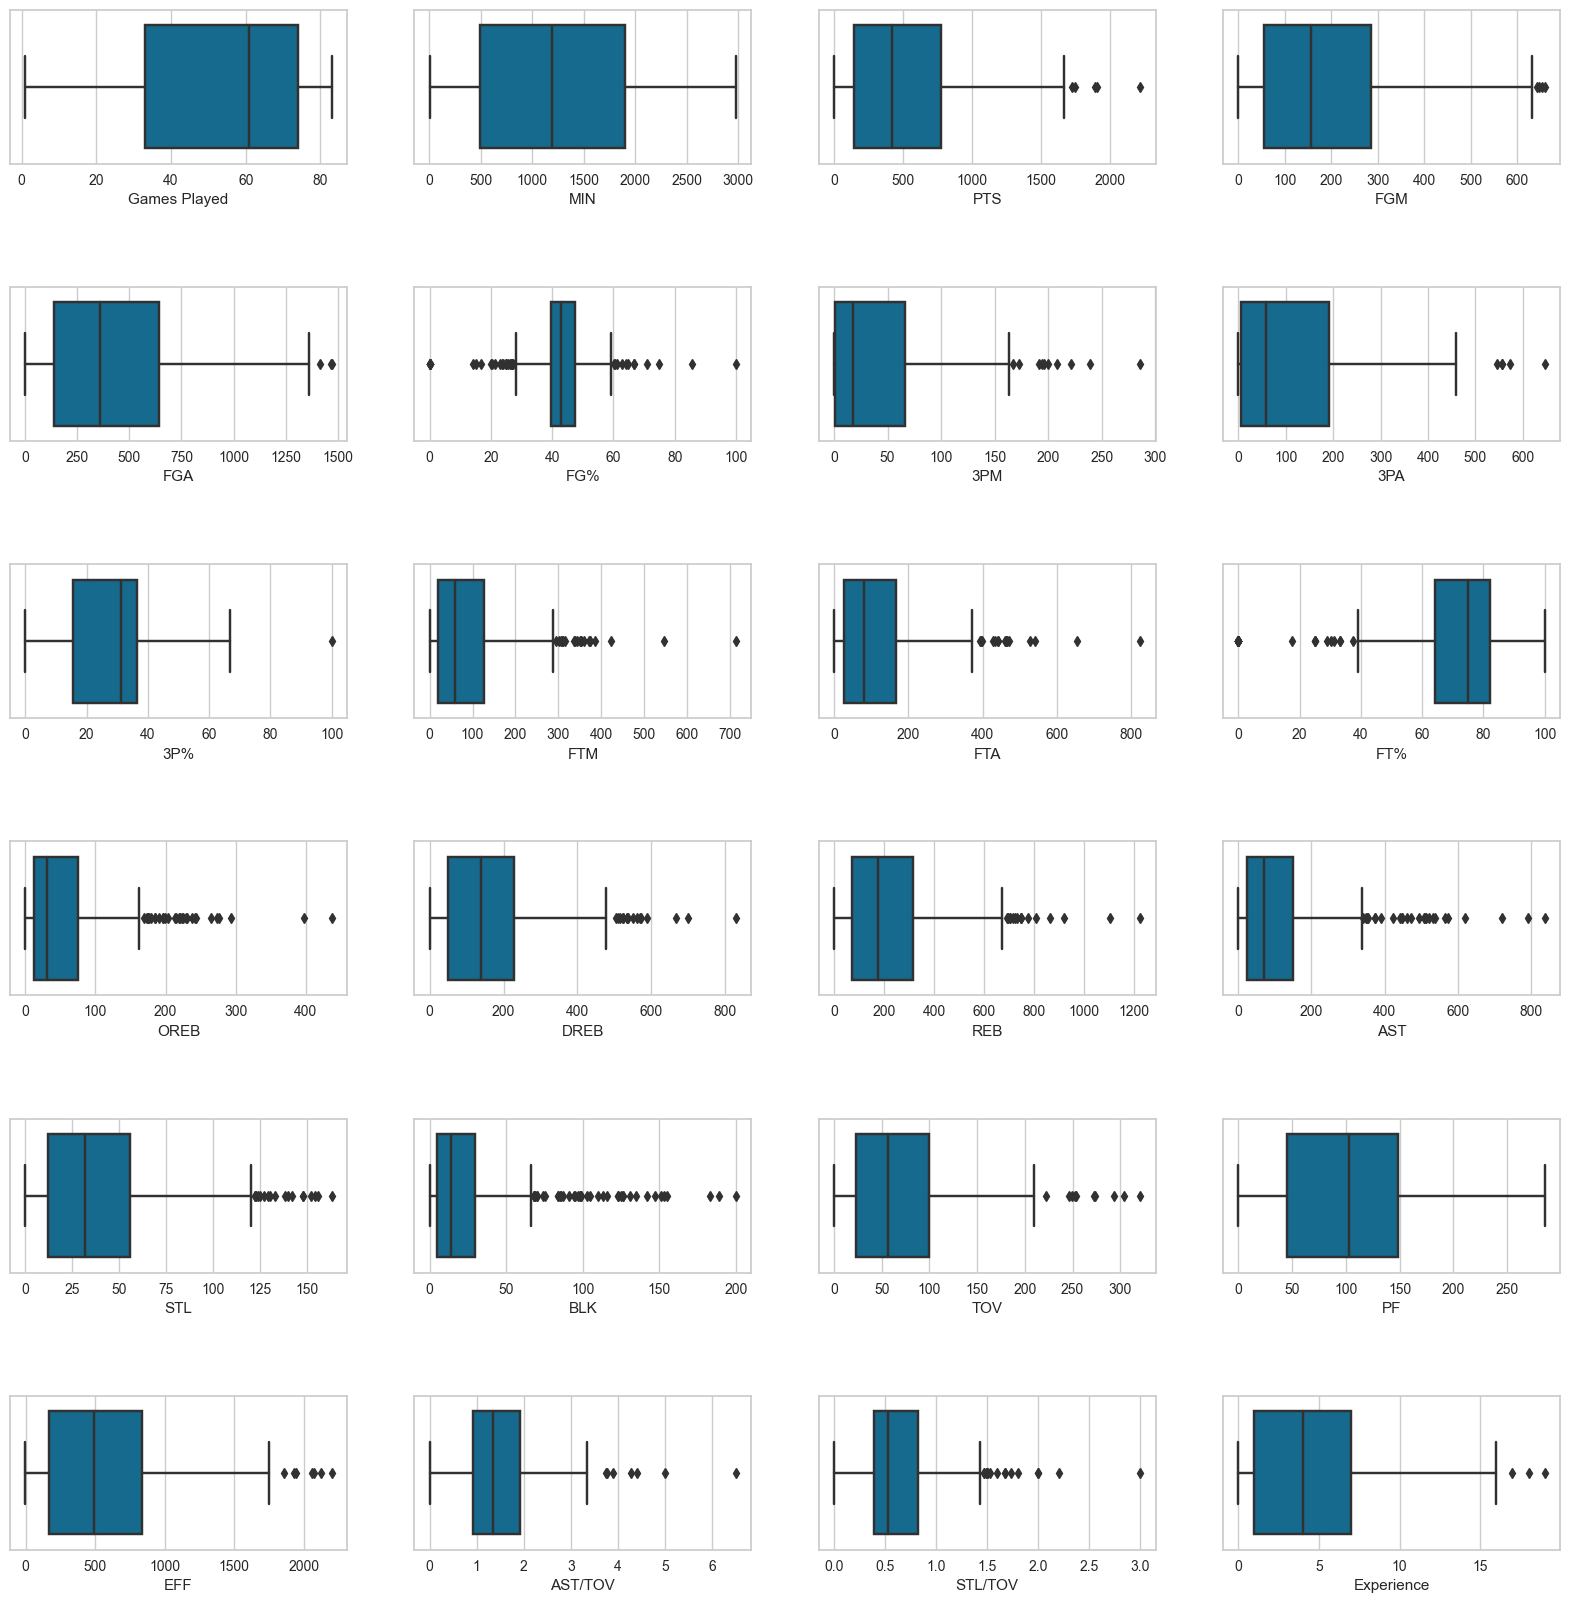

In [15]:
fig = plt.figure()
fig.set_size_inches(20, 20)
fig.subplots_adjust(hspace=0.8, wspace=0.2)

jum = 1
for i in range(len(df.columns)):
    ax = fig.add_subplot(6, 4, jum)
    sns.boxplot(x= df.columns[i], data=df)
    # plt.title(X_train[numerik].columns[i])
    jum+= 1

`terlihat ada banyak outlier pada hampir semua fitur yang ada, namun sebelum menangani outlier tersebut ada baiknya mengecek missing value terlebih dahulu` 

# 4.  Preprocessing

In [16]:
df.describe()

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Experience
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,...,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,53.014286,1214.714286,502.108163,188.338776,419.526531,43.099184,39.387755,112.52449,25.519184,86.042857,...,217.353061,110.616327,38.838776,24.075510,68.826531,101.483673,564.330612,1.465837,0.626000,4.597959
std,24.175437,820.570132,422.084232,156.265752,337.367125,9.625231,47.880909,127.38575,15.796603,91.315316,...,191.983916,125.982080,33.389511,31.662852,58.480701,65.326807,464.428031,0.825037,0.367443,3.876361
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000
25%,33.000000,492.250000,145.250000,55.500000,139.000000,39.600000,1.000000,6.00000,15.500000,18.500000,...,70.250000,24.000000,12.250000,5.000000,23.000000,45.500000,165.000000,0.920000,0.392500,1.000000
50%,61.000000,1193.000000,423.000000,156.000000,357.500000,42.900000,18.000000,58.00000,31.300000,58.000000,...,176.000000,70.000000,32.000000,14.000000,56.500000,103.000000,490.500000,1.345000,0.530000,4.000000
75%,74.000000,1905.750000,774.000000,286.000000,642.750000,47.575000,66.000000,192.00000,36.400000,126.750000,...,314.750000,150.750000,55.500000,29.750000,100.000000,148.750000,837.000000,1.920000,0.820000,7.000000
max,83.000000,2981.000000,2217.000000,659.000000,1471.000000,100.000000,286.000000,646.00000,100.000000,715.000000,...,1226.000000,838.000000,163.000000,200.000000,321.000000,285.000000,2202.000000,6.500000,3.000000,19.000000


## Missing Value

In [17]:
mv = df[df.isnull().any(axis=1)]

In [18]:
df.isnull().sum()

Games Played    0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3PM             0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
EFF             0
AST/TOV         0
STL/TOV         0
Experience      0
dtype: int64

## 4.c <i>Handle Outliers</i>

In [19]:
def cek_iqr(df, x):
    q1 = df[x].quantile(0.25) # 25% percentile
    q3 = df[x].quantile(0.75) # 75% percentile
    
    IQR = q3-q1
    bawah  = q1-1.5*IQR
    atas = q3+1.5*IQR
    
    return IQR, bawah, atas


# fungsi untuk mengecek data outlier

def cek_outlier(df, col):   
    iqr, bawah, atas = cek_iqr(df,col)
    return df[(df[col] < bawah) | (df[col] > atas)]

In [20]:
for i in df:
    print('fitur',i,' : outlier', cek_outlier(df, i)[i].size)

fitur Games Played  : outlier 0
fitur MIN  : outlier 0
fitur PTS  : outlier 5
fitur FGM  : outlier 4
fitur FGA  : outlier 3
fitur FG%  : outlier 36
fitur 3PM  : outlier 10
fitur 3PA  : outlier 5
fitur 3P%  : outlier 1
fitur FTM  : outlier 20
fitur FTA  : outlier 16
fitur FT%  : outlier 27
fitur OREB  : outlier 30
fitur DREB  : outlier 16
fitur REB  : outlier 16
fitur AST  : outlier 26
fitur STL  : outlier 18
fitur BLK  : outlier 41
fitur TOV  : outlier 10
fitur PF  : outlier 0
fitur EFF  : outlier 7
fitur AST/TOV  : outlier 7
fitur STL/TOV  : outlier 17
fitur Experience  : outlier 3


In [21]:
dir_x = []
for i in df.columns:
    dir_x.append(i)

In [22]:
windsoriser = Winsorizer(capping_method='iqr', tail='both',
                          fold=1.5,
                          variables=dir_x)
df_out = windsoriser.fit_transform(df)

## 4.c <i>Data Normalization</i>

In [23]:
scaler = MinMaxScaler()

new_df = scaler.fit_transform(df_out)

# 5. <i>Modelling</i>

## 5.1 K-MEANS

### 5.1.a Find an Optimum K

##### Mendefinisikan Baseline

In [24]:
kmeans = KMeans(n_clusters = 2, random_state=10)

In [25]:
kmeans.fit(new_df)

KMeans(n_clusters=2, random_state=10)

##### K Elbow Visualizer (yellowbrick library)

In [26]:
kelbow_method = KElbowVisualizer(kmeans, new_df, k=(3,16), figsize=(2,2))

`berdasarkan dari k elbow method , didapatkan bahwa optimum k adalah 6`

### 5.1.b Training Model

In [27]:
kmeans_opt= KMeans(n_clusters=6, init = 'k-means++', random_state=10)
kmeans_opt.fit(new_df)

KMeans(n_clusters=6, random_state=10)

In [28]:
df_k = df.copy()

# fitur CLUSTER adalah hasil clustering
df_k['CLUSTER'] = kmeans_opt.labels_

# fitur constant ini akan digunakan untuk visualisasi
df_k['constant'] = 'constant'

### 5.1.c Conclusion

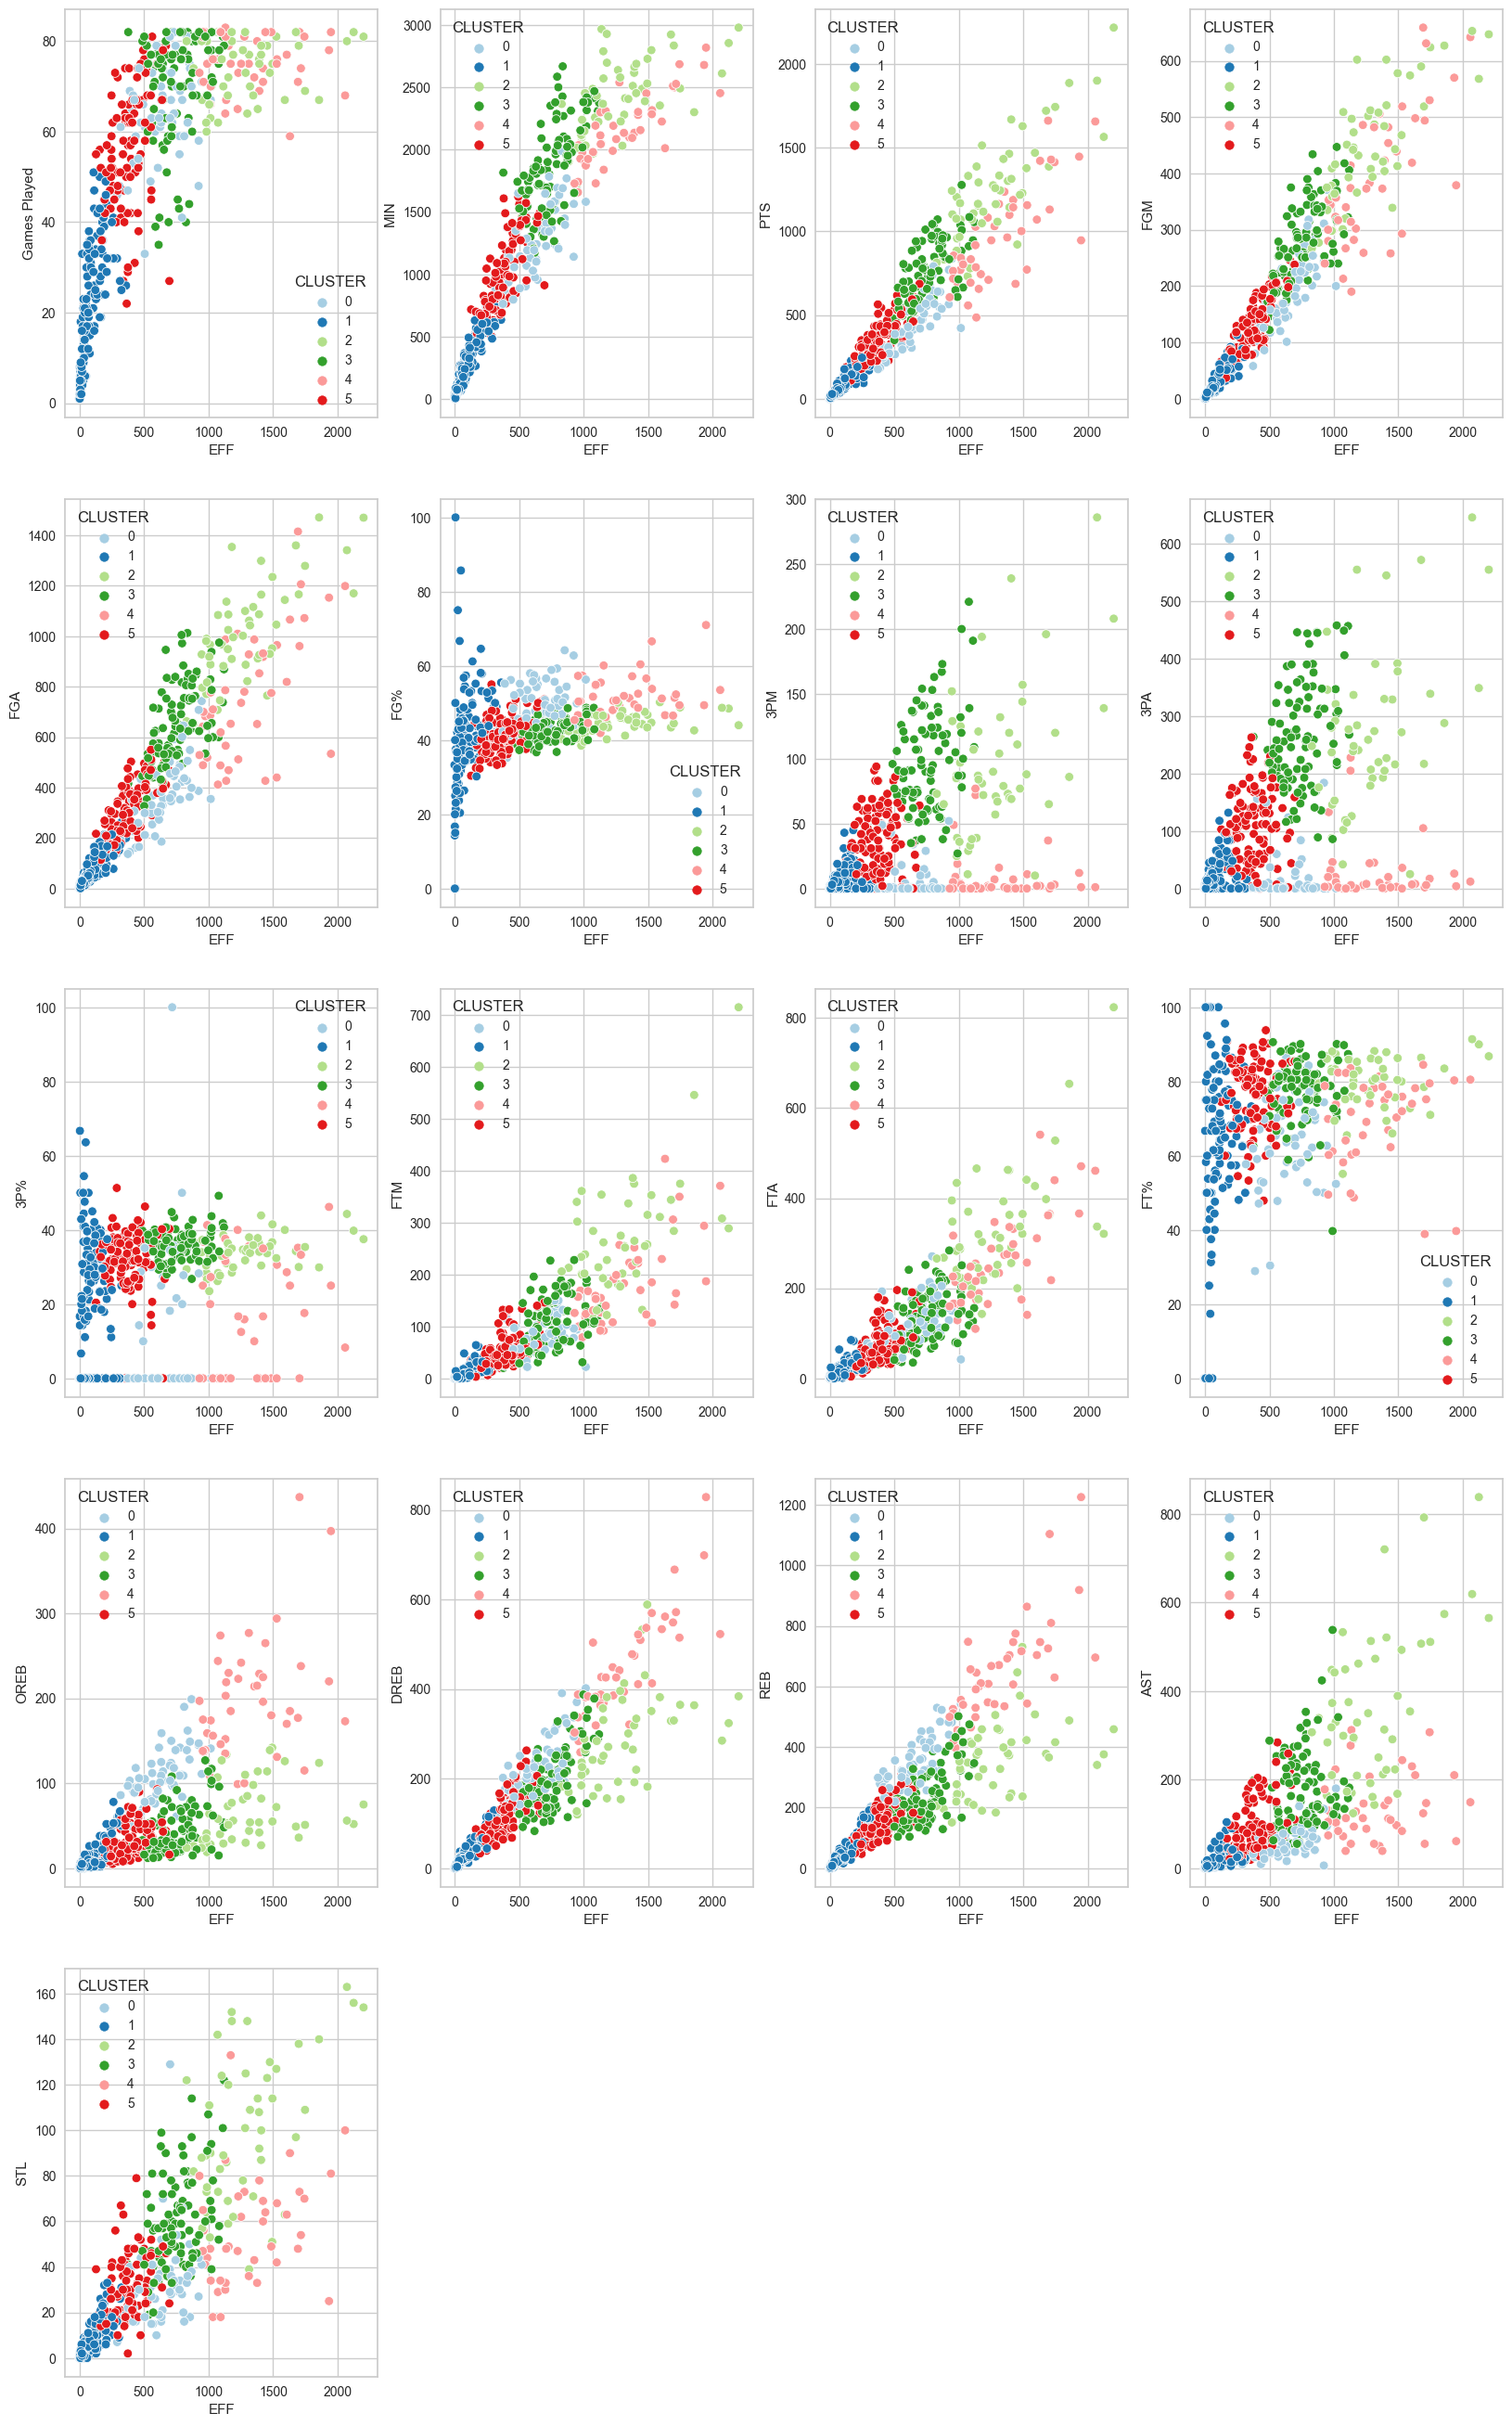

In [57]:
plt.rcParams['figure.figsize'] =(20,40)

col_name = ['Games Played', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'AST/TOV', 'STL/TOV', 'Experience']

for num in range(0,17):
    ax = plt.subplot(6,4,num+1)
    col = col_name[num]
    gam =sns.scatterplot(data=df_k, x= 'EFF', y=col, hue="CLUSTER", palette='Paired')

## 5.2 Agglomerative Clustering

### 5.2.a Find an Optimum K

#### Mendefinisikan Baseline

In [58]:
agg = AgglomerativeClustering()
agg.fit(new_df)

AgglomerativeClustering()

#### K Elbow Visualizer

In [59]:
kelbow_method_agg = KElbowVisualizer(agg, new_df, k=(3,16), figsize=(8,8))

### 5.2.b Training Model

In [60]:
agglomerative = AgglomerativeClustering(n_clusters=6)
agglomerative.fit(new_df)

AgglomerativeClustering(n_clusters=6)

In [61]:
# membuat df copy untuk visualisasi 
df_agg = df.copy()

# fitur CLUSTER adalah hasil clustering
df_agg['CLUSTER'] = agglomerative.labels_

df_agg['CLUSTER'] = df_agg['CLUSTER'].astype('object')

# fitur constant ini akan digunakan untuk visualisasi
df_agg['constant'] = 'constant'

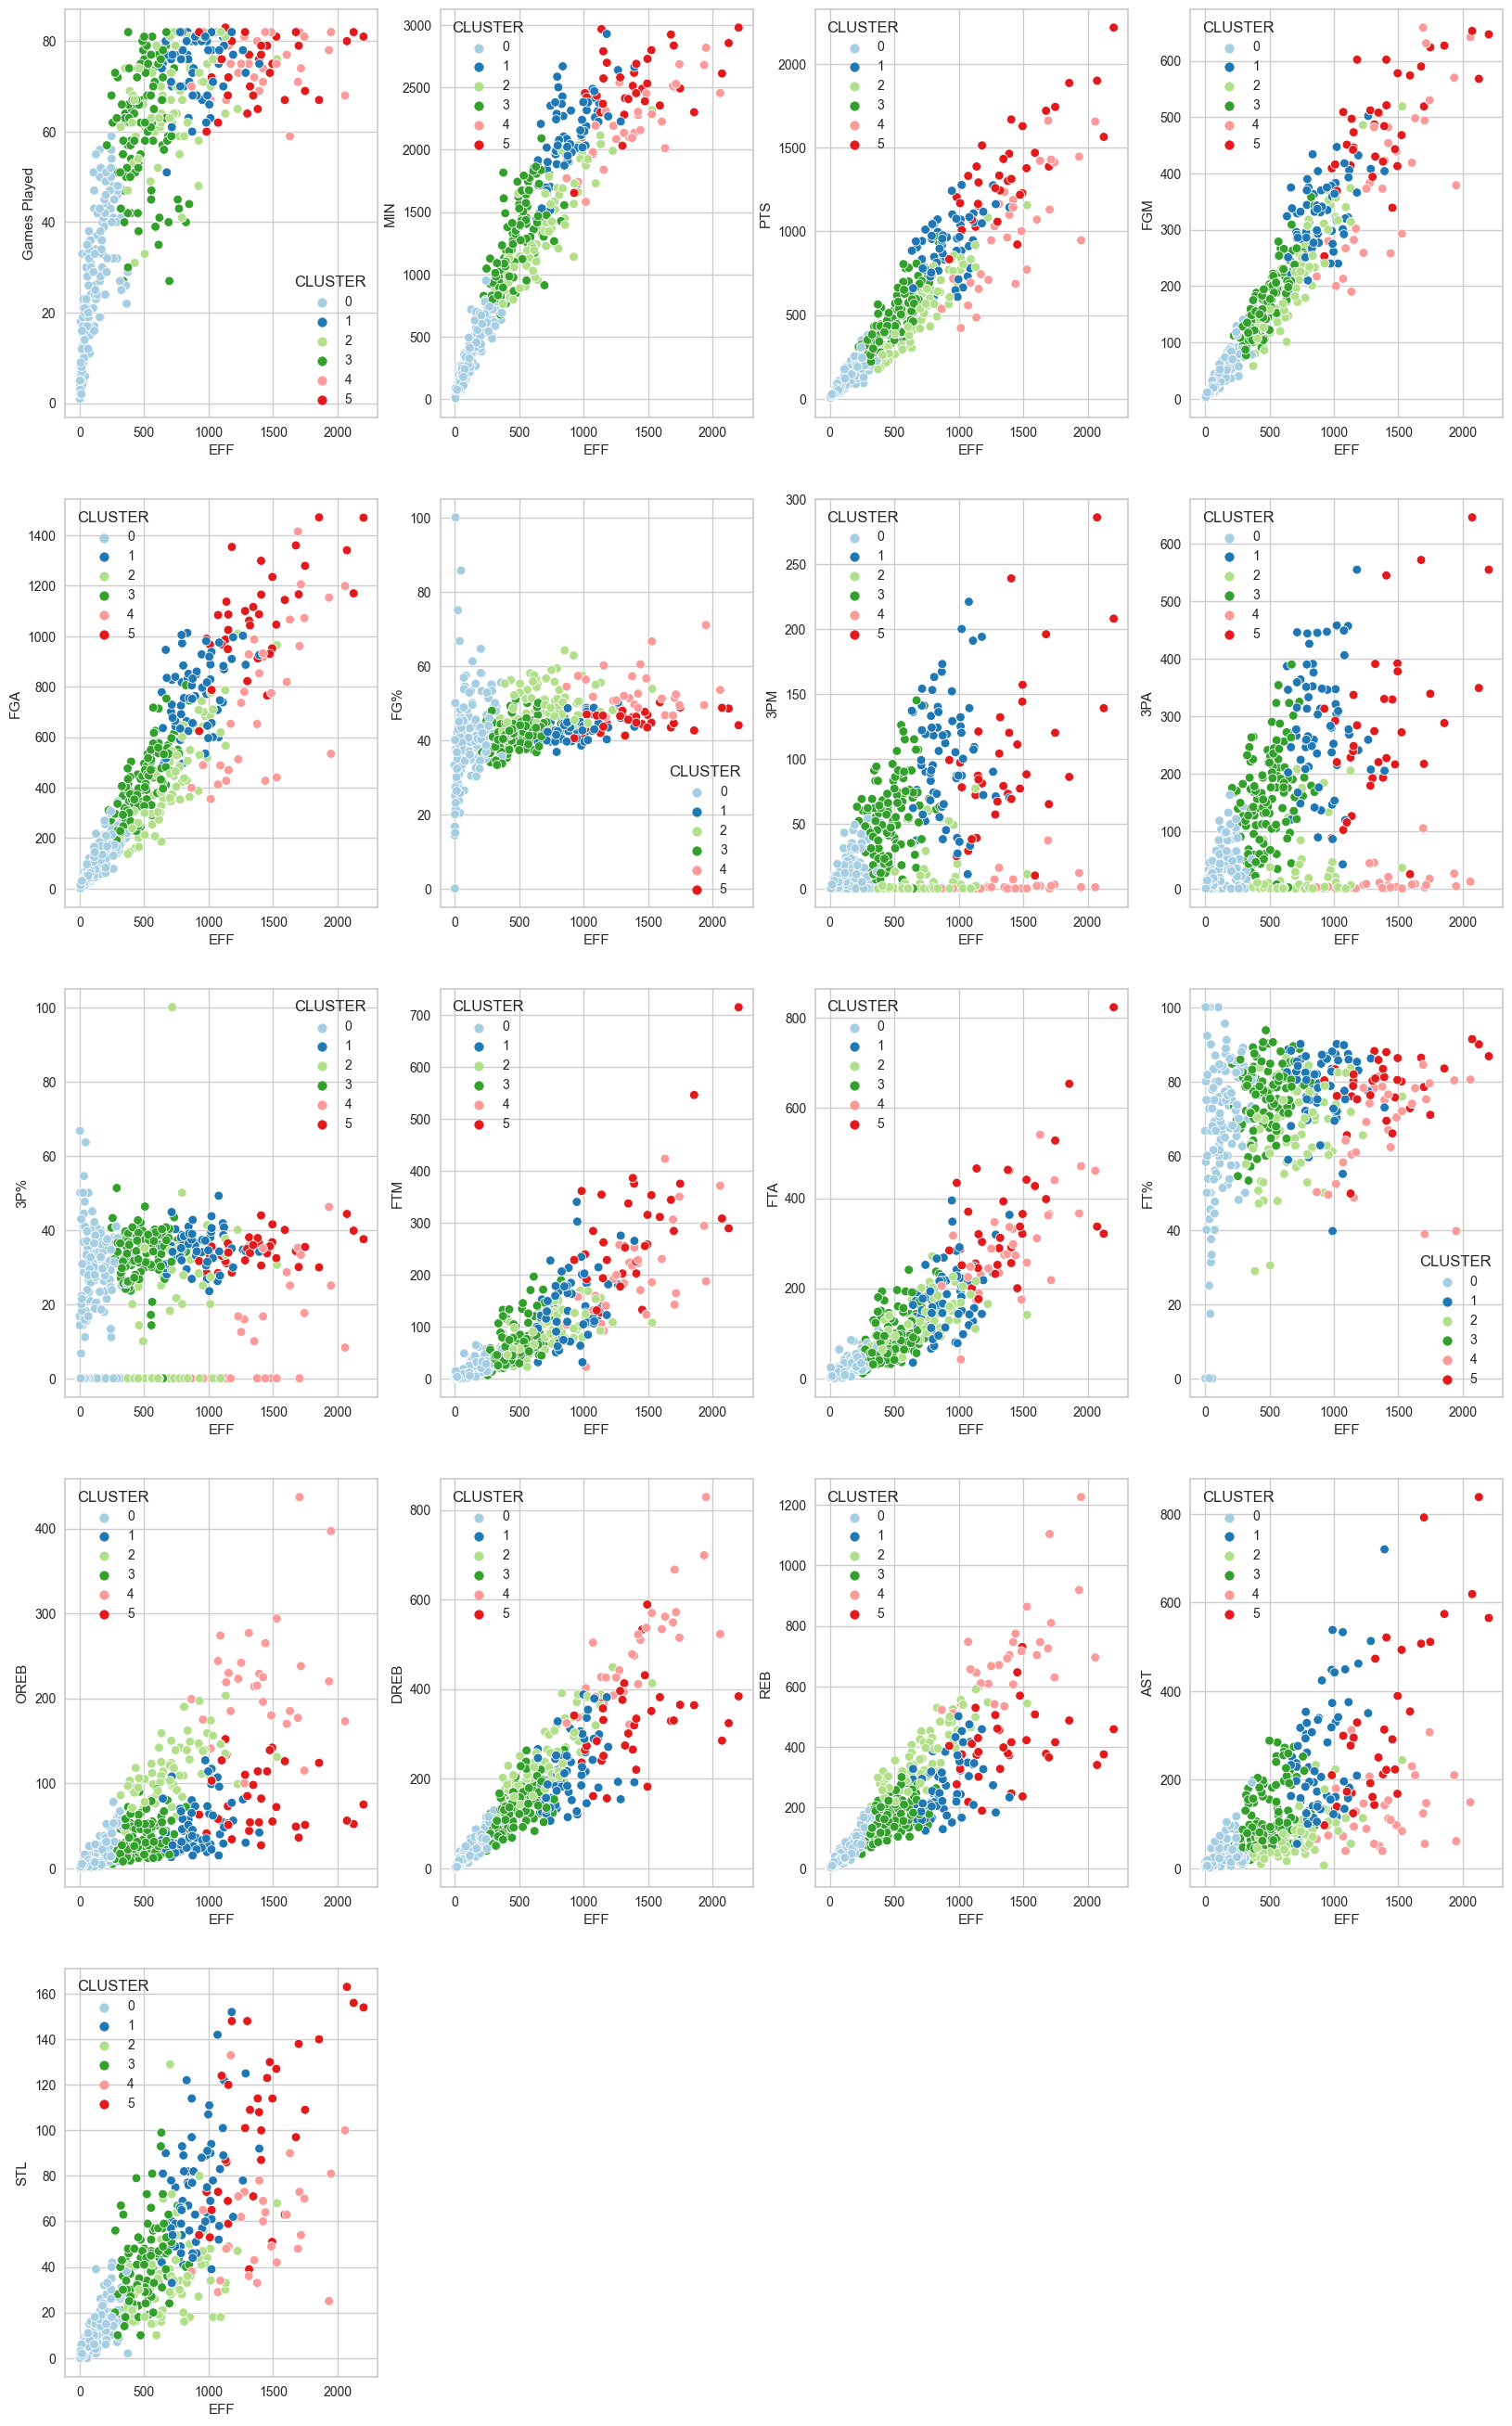

In [83]:
plt.rcParams['figure.figsize'] =(20,40)

for num in range(0,17):
    ax = plt.subplot(6,4,num+1)
    col = col_name[num]
    gam =sns.scatterplot(data=df_agg, x= 'EFF', y=col, hue="CLUSTER", palette='Paired')

### 5.2.c Conclusion

- karena model K-Means dan Agglomerative Clustering menghasilkan hasil yang serupa, maka akan digunakan salah satunya saja pada kasus ini akan digunakan K-Means CLustering

- Berdasarkan hasil modelling, didapatkan 6 kluster dengan penjelasan sebagai berikut:
    1. Cluster 0 = adalah tipe cluster yang Menengah, cluster ini merupakan cluster yang mempunyai kualitas yang cukup baik dimana player pada cluster ini merupakan player yang cadangan biasanya player ke 7 - 12, cluster ini bisa menyumbangkan rata-rata 454 point per musim, dari segi Field goal cluster ini cukup baik karena mempunyai 50% Field Goal Percentage namun perlu ditingkatkan pada sisi 3 Point karena player pada cluster ini tidak terlalu handal dalam 3 Point
    #
    2. Cluster 1 = adalah cluster yang paling rendah dimana cluster ini hanya menyumbangkan 77 point hal ini juga disebabkan karena games played yang kurang, biasanya cluster ini diisi oleh rookie atau sophomore dan juga oleh pemain lapis 3 yaitu pemain 9-12. semua skill wajib ditingkatkan oleh pemain pada cluster ini.
    #
    3. Cluster 2 = adalah cluster terbaik dimana cluster ini diisi oleh bintang ataupun pemain all star, cluster ini dapat menyumbangkan point dengan rata-rata 1270 point dalam satu musim, namun yang harus di tingkatkan adalah field goal yang masih lumayan rendah yaitu sebanyak 44% dan 3point nya hanya 34%. akan tetapi statistik lainnya dari cluster ini sangatlah baik karna mampu mengangkat kualitas dari tim hal ini disebabkan karena pemain pada cluster ini sangatlah efficient.
    #
    4. Cluster 3 = adalah adalah cluster yang bagus dimana pemain pada cluster ini di mampu menyumbang rata-rata 759 point dalam satu musim, pemain ini juga memiliki field goal yang lumayan bagus dimana rata-ratanya adalah 42% dan 3 point pemain pada cluster ini adalah yang terbaik namun masih harus tetap ditingkatkan
    #
    5. Cluster 4 = adalah salah satu cluster terbaik dimana cluster ini juga diisi oleh all-star dan star sehingga mampu meningkatkan kualitas suatu tim, cluster ini merupakan cluster yang sangat eficient dengan skor rata rata diangka 1322, cluster ini juga merupakan cluster dengan rebound terbanyak dan field goal terbaik dari semua cluster yang artinya cluster ini kebanyakan diisi oleh bigman.
    #
    6. Cluster 5 = adalah cluster adalah cluster yang lumayan berkontribusi untuk tim dimana cluster ini menyumbangkan 351 point dengan minute play tidak terlalu banyak cluster ini kebanyakan diisi oleh pemain lapis 2, pemain pada cluster ini lebih banyak melakukan penetrasi kedalam dibandingkan dengan 3point namun 3 point percentagenya tidak terlalu buruk.
